In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

import re
import string

from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


import string
string.punctuation

from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
reviews_df = pd.read_csv('/content/drive/My Drive/projects/Alexa sentiment analysis/amazon_alexa.tsv', sep='\t')


In [4]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [8]:
reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f853393c4e0>,
      dtype=object)

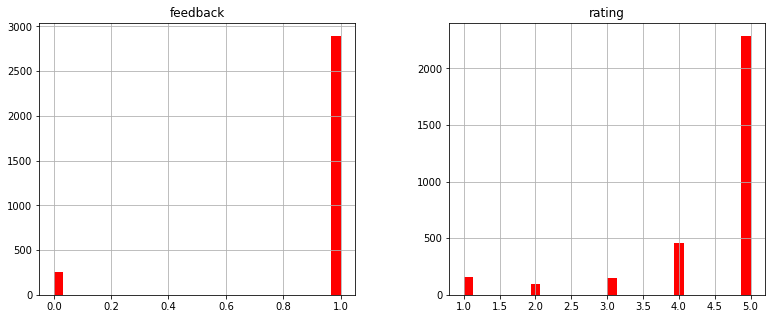

In [9]:
reviews_df.hist(bins = 30, figsize = (13,5), color = 'r')

In [10]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


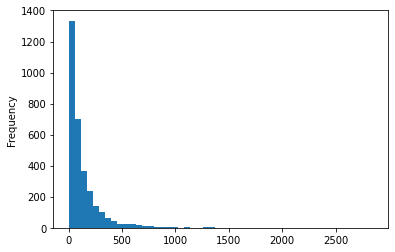

In [11]:
reviews_df['length'].plot(bins=50, kind='hist') 

In [12]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [13]:
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [14]:
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [15]:
temp = reviews_df.groupby('rating').count()['verified_reviews'].reset_index().sort_values(by='verified_reviews',ascending=False)
temp.style.background_gradient(cmap='Purples')


,rating,verified_reviews
4,5,2286
3,4,455
0,1,161
2,3,152
1,2,96


In [16]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnelarea(
    text =temp.rating,
    values = temp.verified_reviews,
    title = {"position": "top center", "text": "Funnel-Chart of Rating Distribution"}
    ))
fig.show()


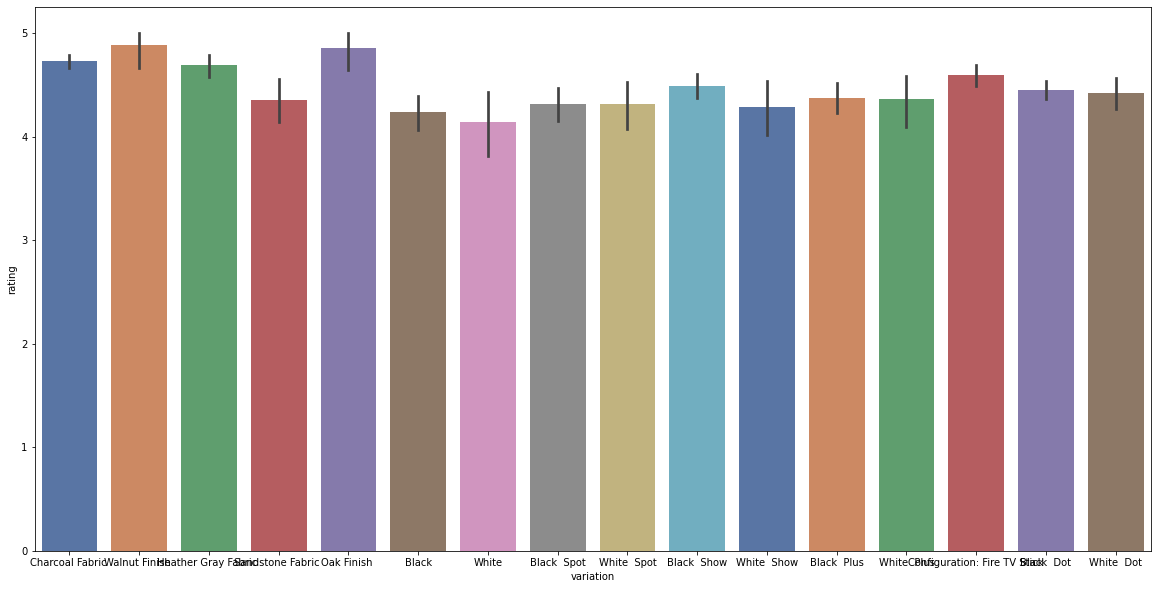

In [17]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'variation', y='rating', data = reviews_df, palette = 'deep')

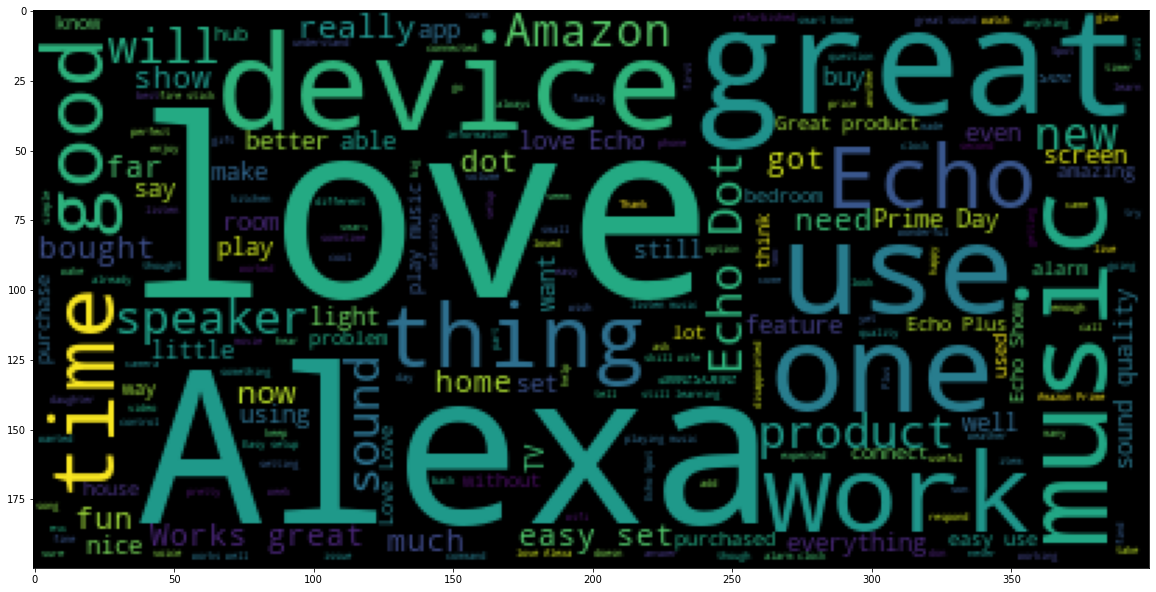

In [18]:
sentences = reviews_df['verified_reviews'].tolist()
sentences_as_one_string =" ".join(sentences)
sentences_as_one_string
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [19]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [20]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [21]:
reviews_df_1 = reviews_df.drop(['verified_reviews'], axis=1)
reviews_df_clean_concat = pd.concat([reviews_df_1, reviews_df_clean], axis=1)

In [22]:
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [23]:
reviews_df_clean_concat

,rating,date,variation,feedback,length,verified_reviews
0,5,31-Jul-18,Charcoal Fabric,1,13,"[Love, Echo]"
1,5,31-Jul-18,Charcoal Fabric,1,9,[Loved]
2,4,31-Jul-18,Walnut Finish,1,195,"[Sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,1,172,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,1,5,[Music]
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,1,50,"[Perfect, kids, adults, everyone]"
3146,5,30-Jul-18,Black Dot,1,135,"[Listening, music, searching, locations, check..."
3147,5,30-Jul-18,Black Dot,1,441,"[love, things, running, entire, home, TV, ligh..."
3148,5,30-Jul-18,White Dot,1,380,"[complaint, sound, quality, isnt, great, mostl..."


In [24]:
positive = reviews_df_clean_concat[reviews_df_clean_concat['feedback']==1]
negative = reviews_df_clean_concat[reviews_df_clean_concat['feedback']==0]

In [25]:
positive

,rating,date,variation,feedback,length,verified_reviews
0,5,31-Jul-18,Charcoal Fabric,1,13,"[Love, Echo]"
1,5,31-Jul-18,Charcoal Fabric,1,9,[Loved]
2,4,31-Jul-18,Walnut Finish,1,195,"[Sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,1,172,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,1,5,[Music]
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,1,50,"[Perfect, kids, adults, everyone]"
3146,5,30-Jul-18,Black Dot,1,135,"[Listening, music, searching, locations, check..."
3147,5,30-Jul-18,Black Dot,1,441,"[love, things, running, entire, home, TV, ligh..."
3148,5,30-Jul-18,White Dot,1,380,"[complaint, sound, quality, isnt, great, mostl..."


In [26]:
negative

,rating,date,variation,feedback,length,verified_reviews
46,2,30-Jul-18,Charcoal Fabric,0,163,"[like, Siri, fact, Siri, answers, accurately, ..."
111,2,30-Jul-18,Charcoal Fabric,0,53,"[Sound, terrible, u, want, good, music, get, b..."
141,1,30-Jul-18,Charcoal Fabric,0,18,"[much, features]"
162,1,30-Jul-18,Sandstone Fabric,0,87,"[Stopped, working, 2, weeks, didnt, follow, co..."
176,2,30-Jul-18,Heather Gray Fabric,0,20,"[Sad, joke, Worthless]"
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,0,120,"[Echo, Dot, responds, us, arent, even, talking..."
3048,1,30-Jul-18,White Dot,0,37,"[CONNECTED, PHONE, PLAYLIST]"
3067,2,30-Jul-18,Black Dot,0,240,"[negative, product, terrible, sound, quality, ..."
3091,1,30-Jul-18,Black Dot,0,17,"[didn’t, order]"


In [27]:
top = Counter([item for sublist in positive['verified_reviews'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Positive_common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Positive_common_words,count
0,love,548
1,Alexa,497
2,great,486
3,Echo,466
4,music,463
5,like,425
6,use,420
7,Love,363
8,one,289
9,sound,279


In [28]:
fig = px.treemap(temp_positive, path=['Positive_common_words'], values='count',title='Tree Of Most Common positive Words')
fig.show()

In [29]:
top = Counter([item for sublist in negative['verified_reviews'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Negative_common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Negative_common_words,count
0,device,52
1,would,51
2,Amazon,50
3,Alexa,46
4,Echo,45
5,like,43
6,work,43
7,echo,43
8,get,41
9,one,40


In [30]:
fig = px.treemap(temp_negative, path=['Negative_common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [31]:
def plot_wordcloud(text, mask=None, max_words=500, max_font_size=150, figure_size=(15.0,12.0), color = 'black',
                   title = None, title_size=40, image_color=False):
    #stopwords = set(STOPWORDS)
    #more_stopwords = {'u', "im"}
    #stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    #stopwords = STOPWORDS,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

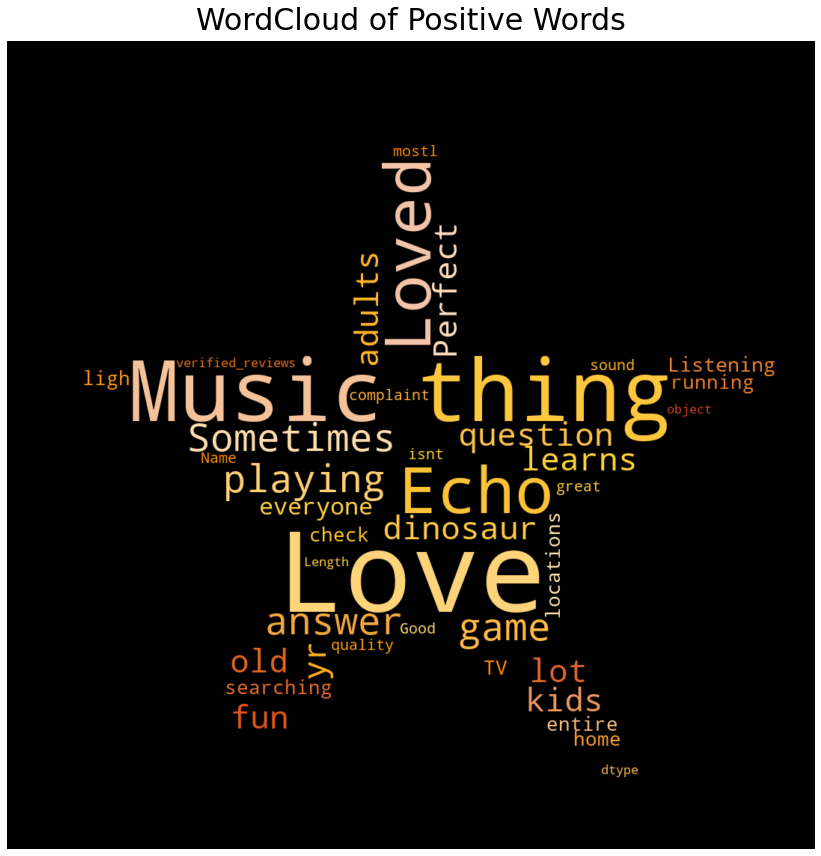

In [32]:
pos_mask = np.array(Image.open('/content/drive/My Drive/projects/Alexa sentiment analysis/star.png'))
plot_wordcloud(positive.verified_reviews,mask=pos_mask,color='black',max_font_size=150,title_size=30,title="WordCloud of Positive Words", image_color=True)

In [33]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'],axis=1)
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [34]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
reviews_df.drop(['variation'], axis=1, inplace=True)

In [36]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)

In [37]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [38]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [39]:
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())


In [40]:
reviews_df = pd.concat([reviews_df, reviews], axis=1)


In [41]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,5171,5172,5173,5174,5175,5176,5177,5178,5179,5180,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
X = reviews_df.drop(['feedback'],axis=1)
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,5171,5172,5173,5174,5175,5176,5177,5178,5179,5180,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
y = reviews_df['feedback']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
y_pred_NB = NB_classifier.predict(X_test)
print('Accuracy {} %'.format( 100 * accuracy_score(y_pred_NB, y_test)))

Accuracy 94.44444444444444 %


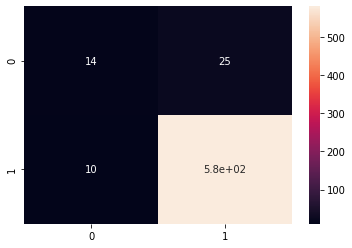

In [47]:
cm = confusion_matrix(y_test, y_pred_NB)
sns.heatmap(cm, annot=True)

In [48]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.58      0.36      0.44        39
           1       0.96      0.98      0.97       591

    accuracy                           0.94       630
   macro avg       0.77      0.67      0.71       630
weighted avg       0.94      0.94      0.94       630



In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred_LR = model.predict(X_test)
print('Accuracy {} %'.format( 100 * accuracy_score(y_pred_LR, y_test)))

Accuracy 95.3968253968254 %


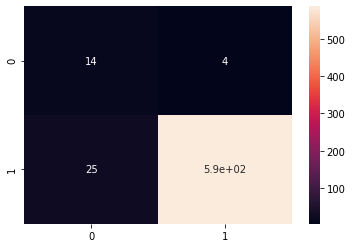

In [51]:
cm = confusion_matrix(y_pred_LR, y_test)
sns.heatmap(cm, annot = True)

In [52]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.78      0.36      0.49        39
           1       0.96      0.99      0.98       591

    accuracy                           0.95       630
   macro avg       0.87      0.68      0.73       630
weighted avg       0.95      0.95      0.95       630

